In [1]:
#Ensiable methods for Machine learning and Data science 
# Auther Nawab khan
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset_url = (r"C:\Users\PMLS\Downloads/tumor.csv")
tumor_df = pd.read_csv(dataset_url)

In [5]:
tumor_df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [7]:
# Get the input features
X = tumor_df.iloc[:, :-1]
# Get the target variable
y = tumor_df.iloc[:, -1:]

In [11]:
# Split the training and testing data
rs = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

In [13]:
# Train a decision tree with all default arguments
model = DecisionTreeClassifier(random_state=rs)

In [15]:
model.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(random_state=123)

In [17]:
preds = model.predict(X_test)

In [19]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [21]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9562043795620438,
 'recall': 0.9583333333333334,
 'precision': 0.92,
 'f1score': 0.9387755102040817}

In [29]:
def plot_decision_tree(model, feature_names):
    plt.subplots(figsize=(40, 30)) 
    tree.plot_tree(model, 
                       feature_names=feature_names,  
                       filled=True)
    plt.show()

In [31]:
feature_names = X.columns.values

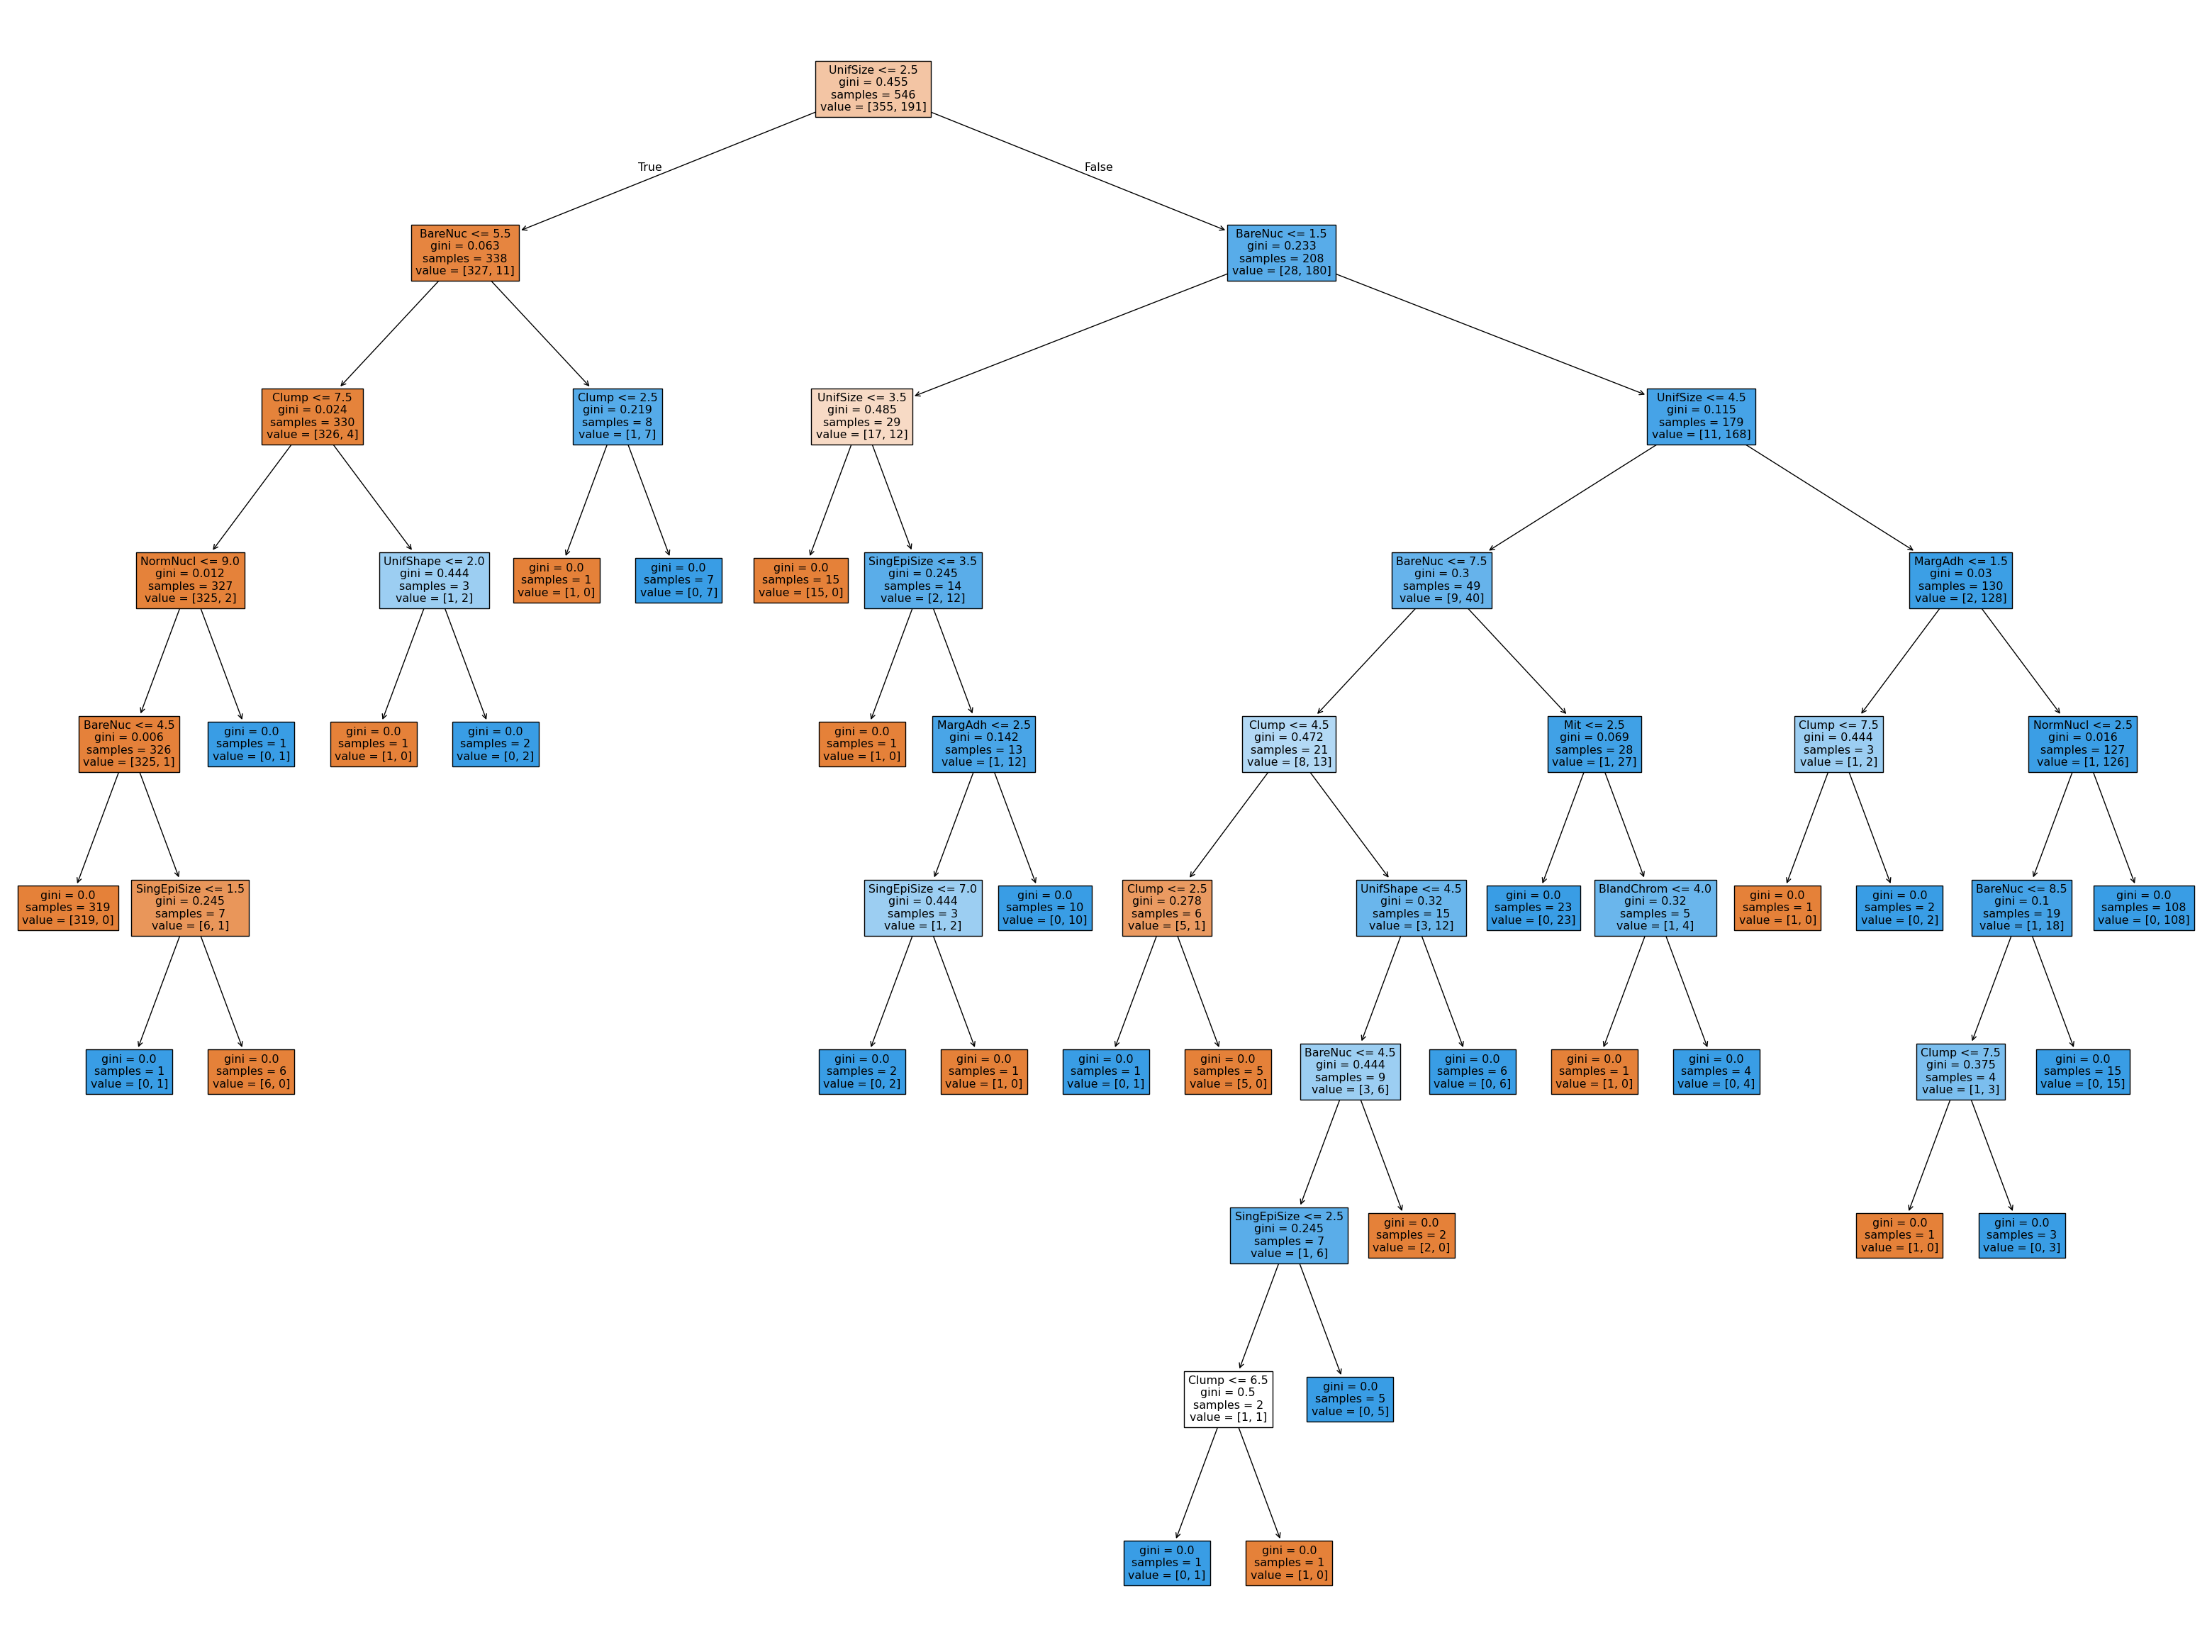

In [33]:
plot_decision_tree(model, feature_names)

In [71]:
custom_model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=5, random_state=rs)

In [73]:
custom_model.fit(X_train, y_train.values.ravel())
preds = custom_model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.9708029197080292,
 'recall': 0.9791666666666666,
 'precision': 0.94,
 'f1score': 0.9591836734693877}

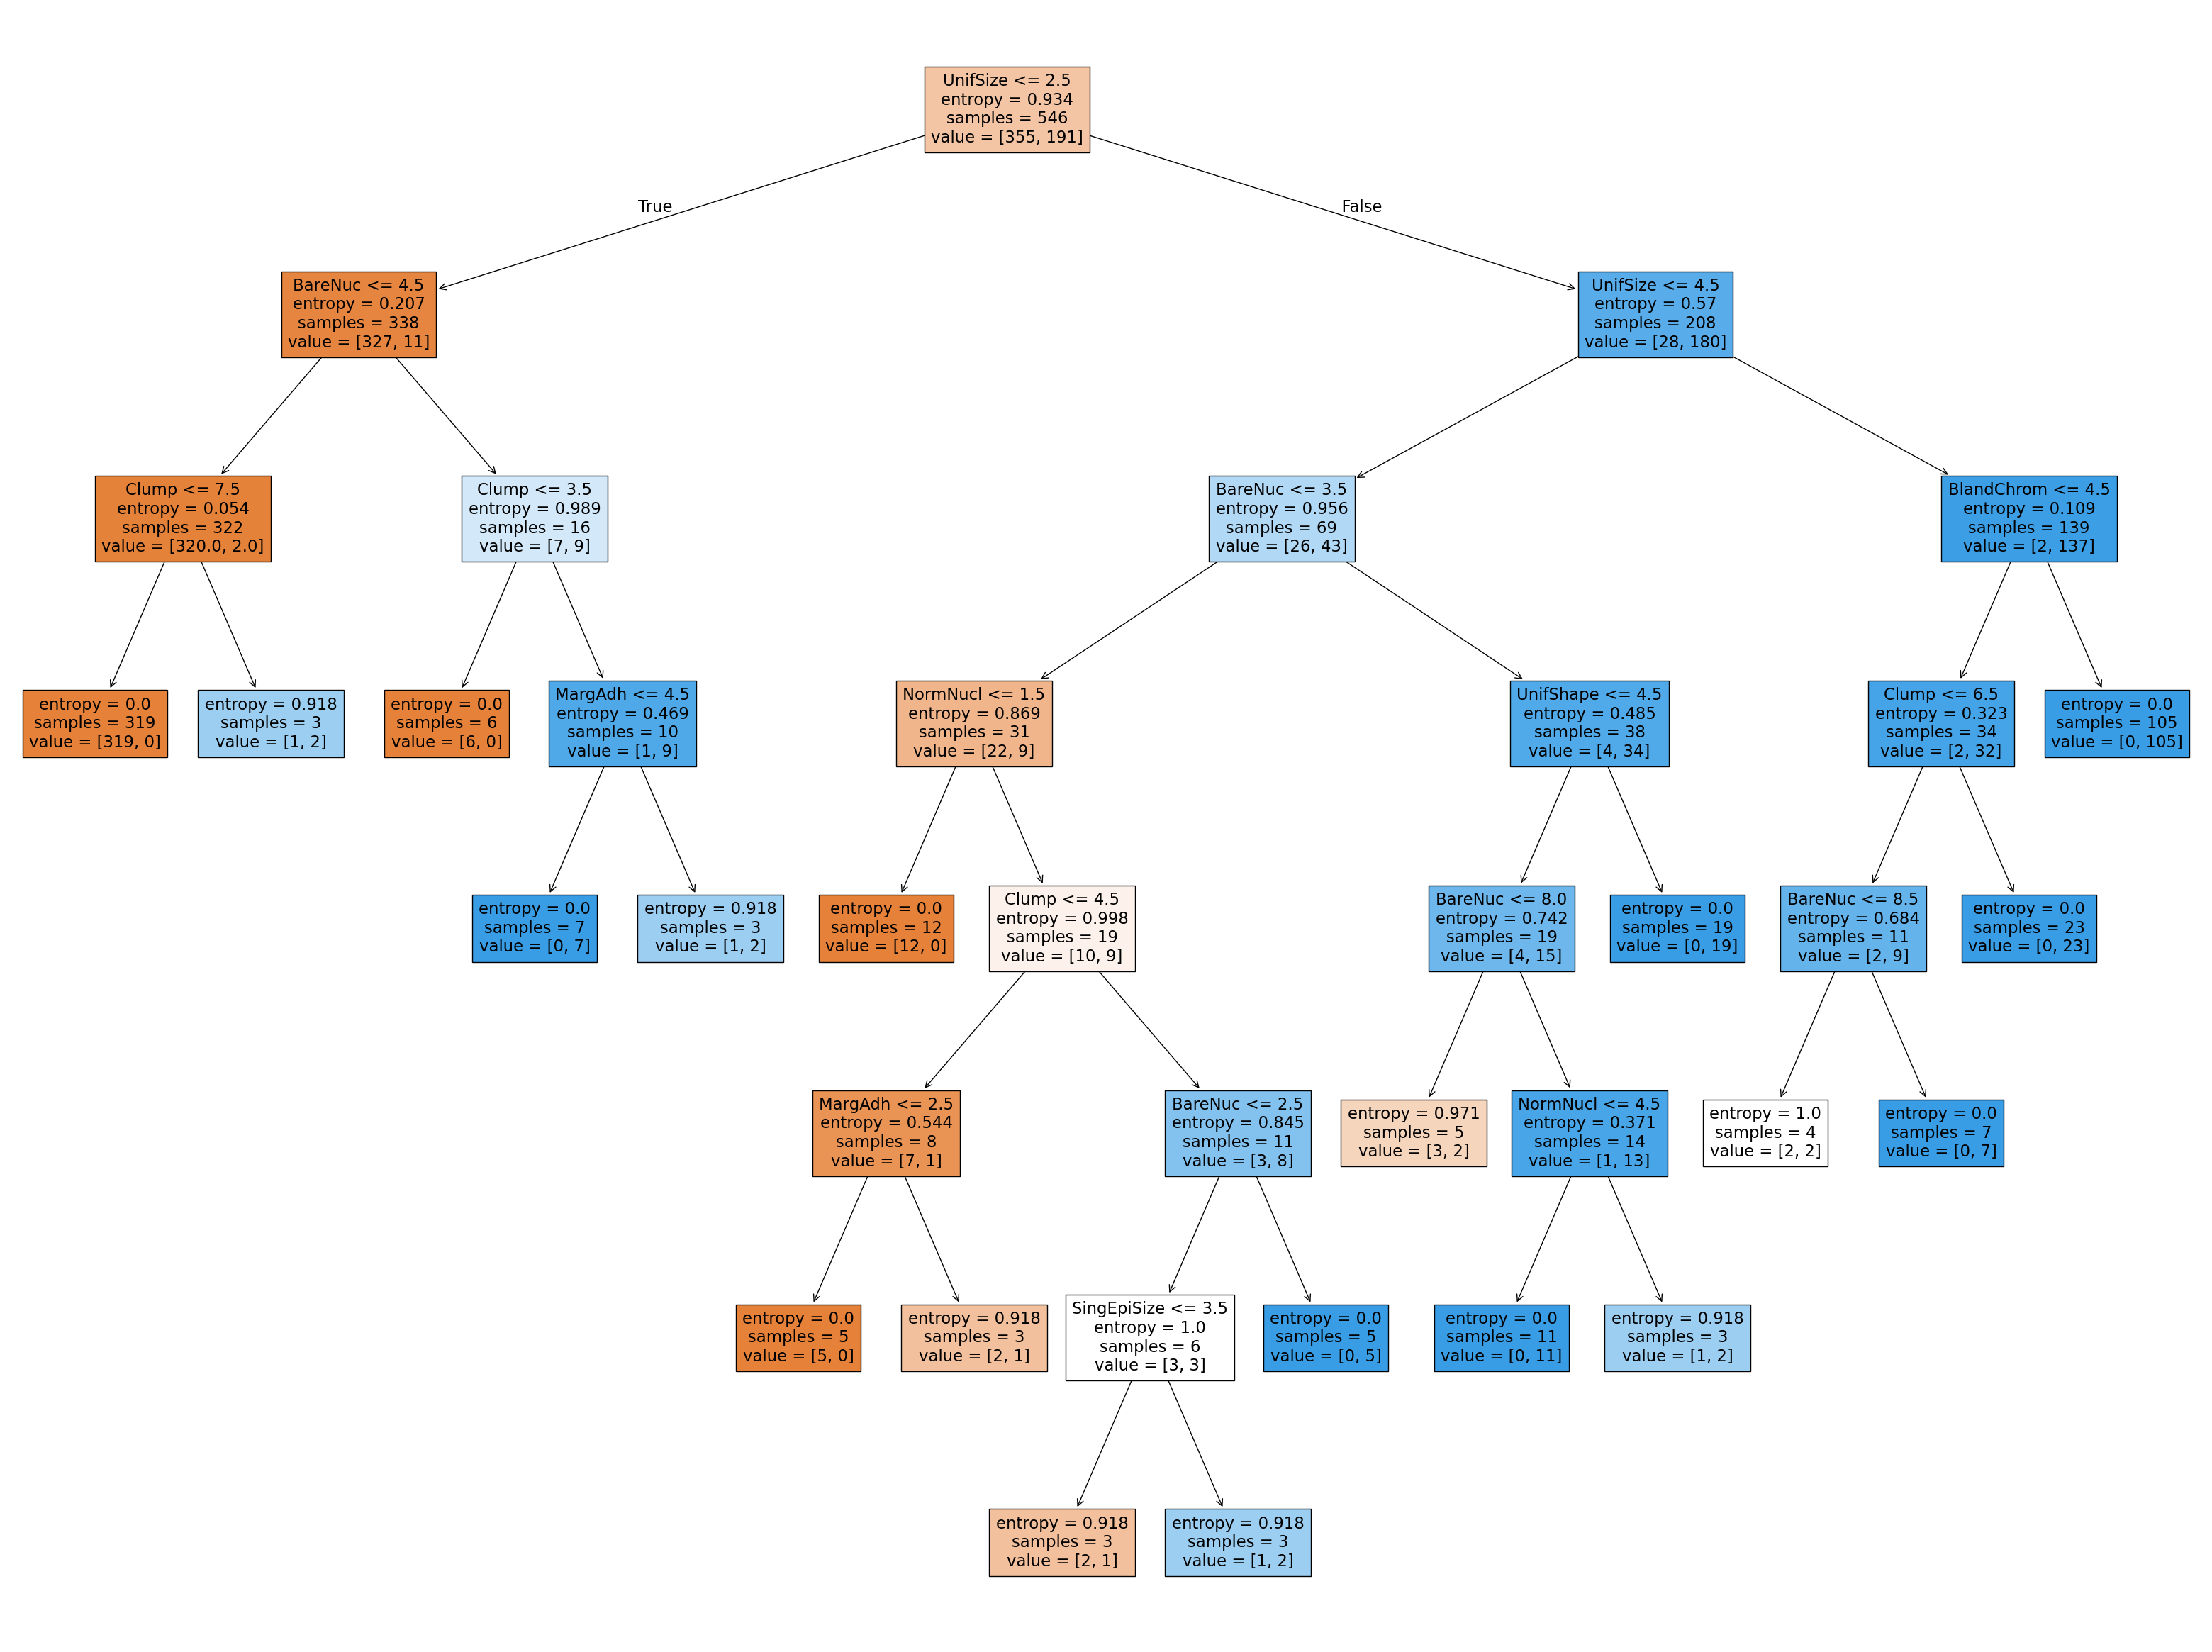

In [41]:
plot_decision_tree(custom_model, feature_names)

In [55]:
custom_model = DecisionTreeClassifier(criterion='entropy', max_depth=80, min_samples_leaf=40, random_state=rs)

In [57]:
custom_model.fit(X_train, y_train.values.ravel())
preds = custom_model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.9197080291970803,
 'recall': 0.9791666666666666,
 'precision': 0.8245614035087719,
 'f1score': 0.8952380952380953}

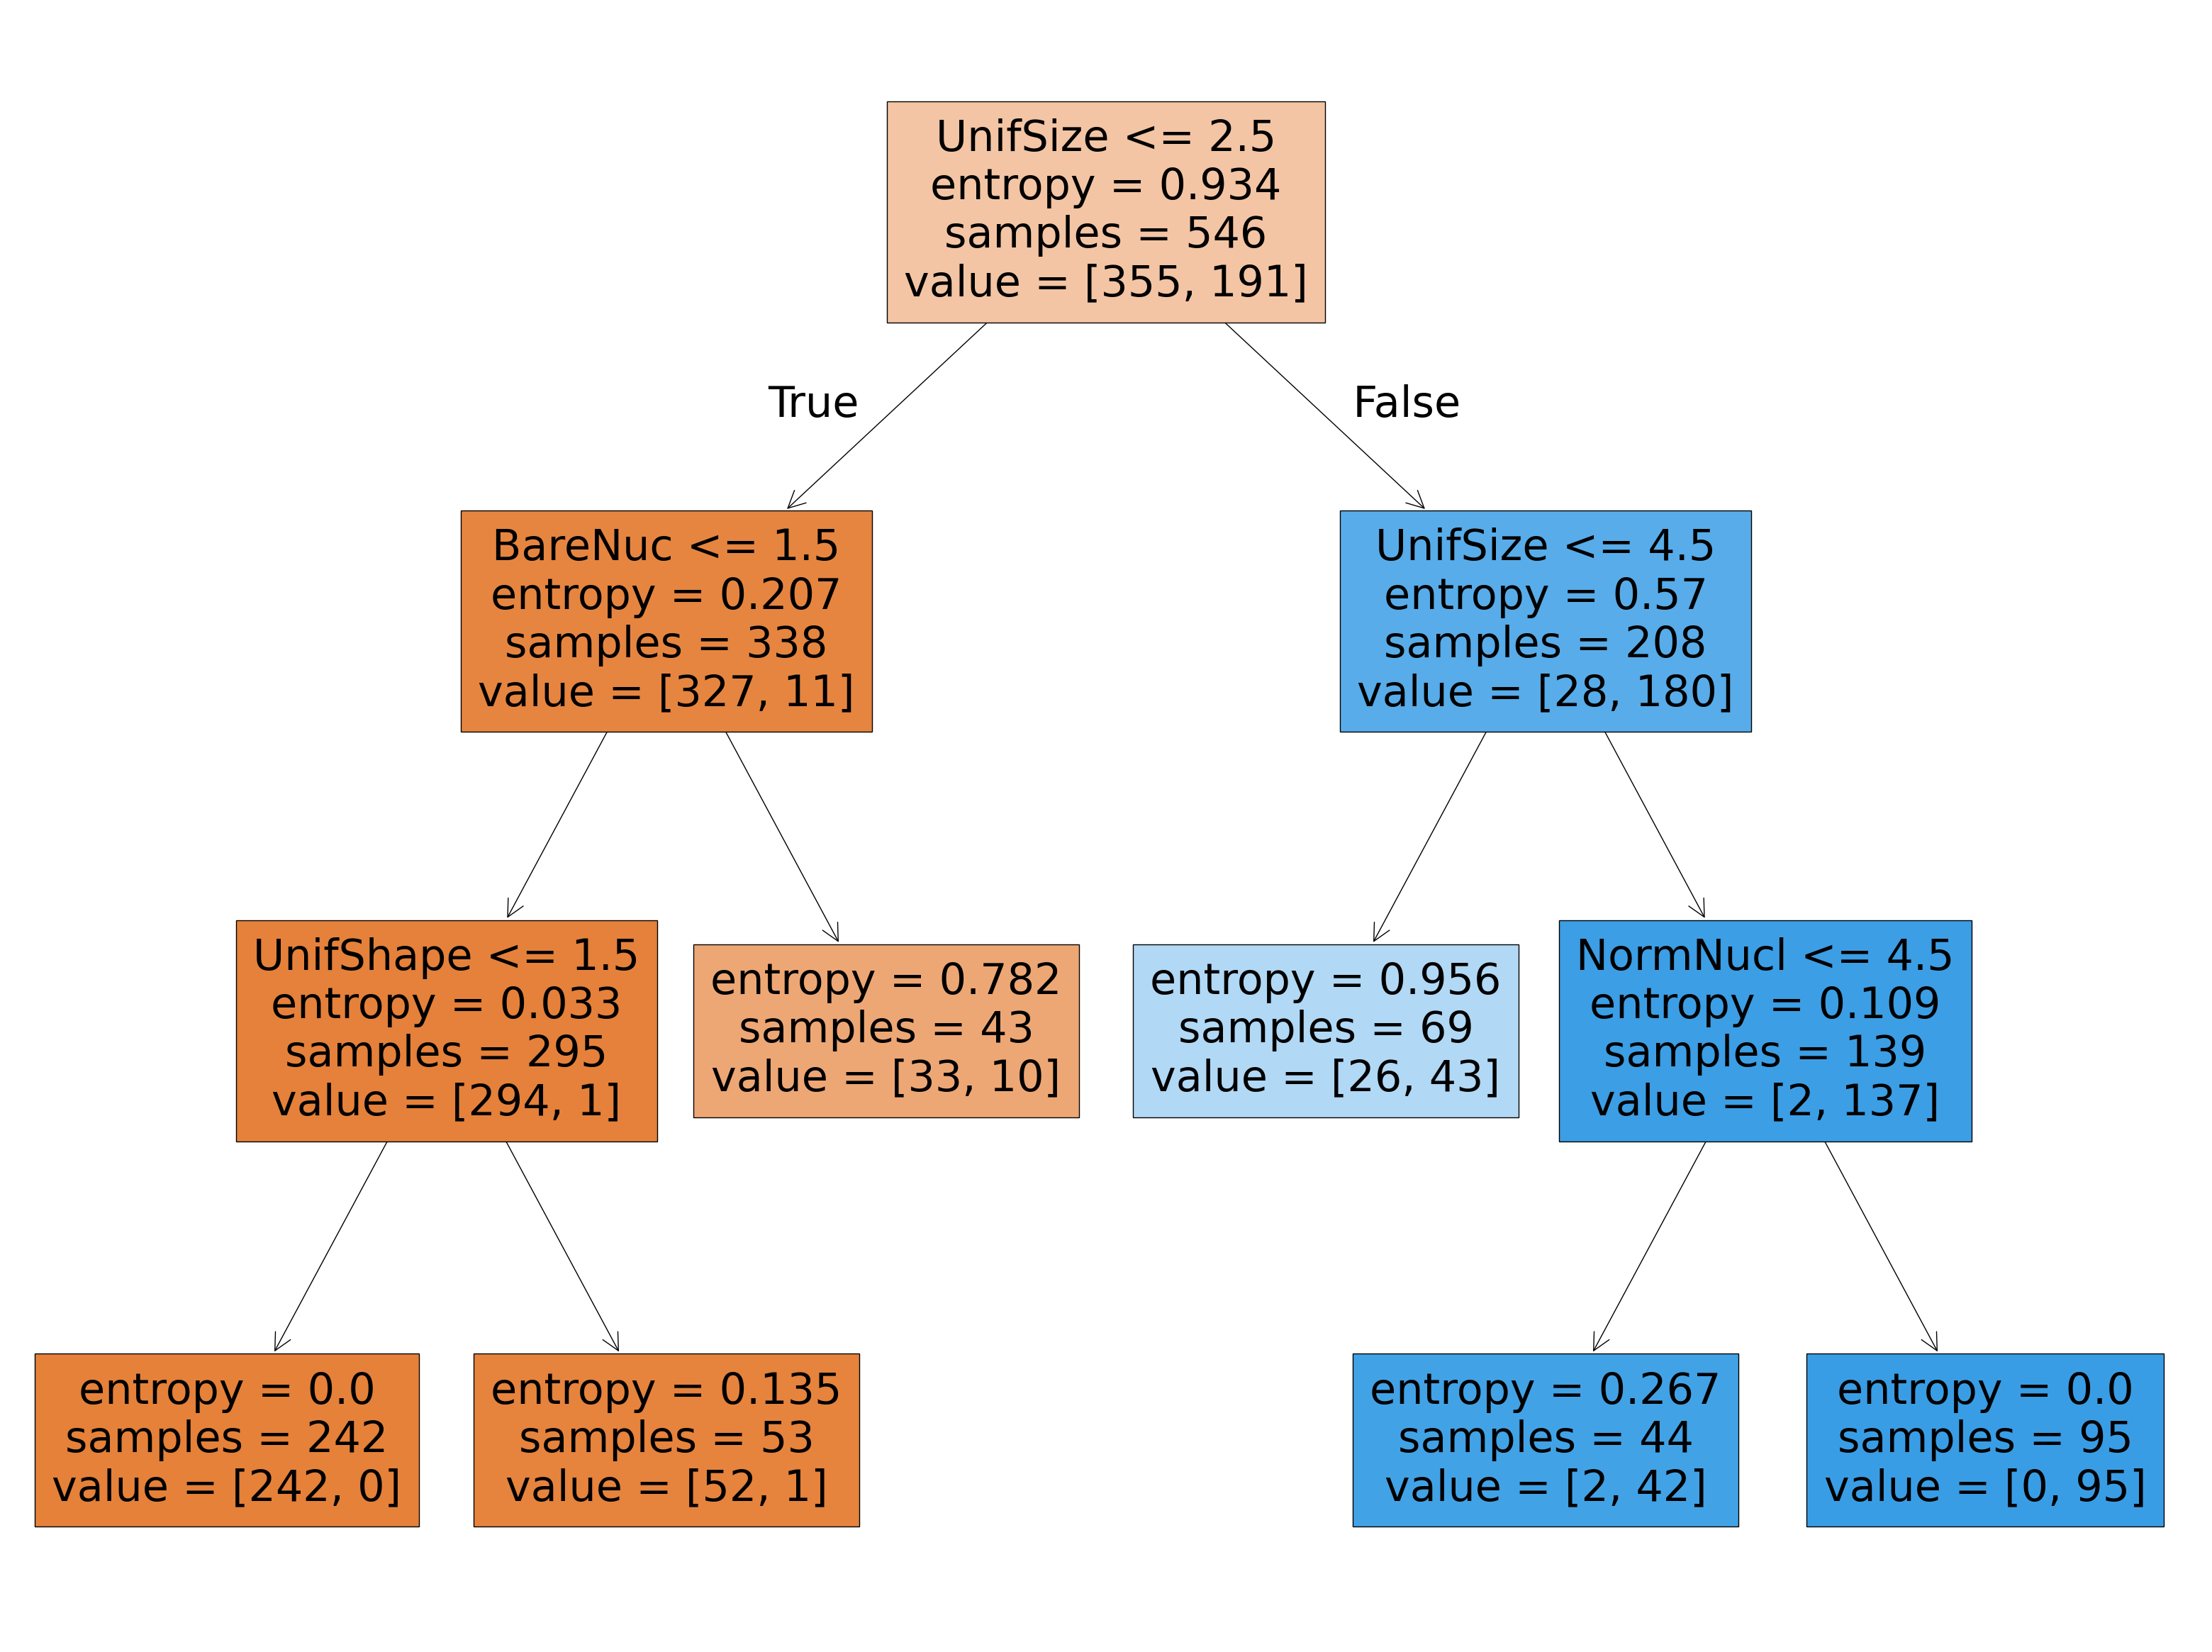

In [59]:
plot_decision_tree(custom_model, feature_names)

In [63]:
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5]
}

In [65]:
model = DecisionTreeClassifier(random_state=rs)

In [67]:
grid_search = GridSearchCV(estimator = model, 
                        param_grid = params_grid, 
                        scoring='f1',
                        cv = 5, verbose = 1)
grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [69]:
best_params

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}

In [1]:
search.best_params_

NameError: name 'search' is not defined